# Team Sample Constraint

- Your choice of algorithm
- Your choice of features
- **Must use the cheap train sample**

In [42]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score




In [2]:
df = pd.read_csv('data/cheap_train_sample.csv')
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K


In [3]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.202380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.815760e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.417530e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df['wage'].value_counts()

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

In [6]:
df['wage'] = df['wage'].map({' <=50K': 0, ' >50K': 1})

In [7]:
df['wage']

0       0
1       0
2       1
3       1
4       1
       ..
6508    0
6509    0
6510    1
6511    0
6512    1
Name: wage, Length: 6513, dtype: int64

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [9]:
df['education'].value_counts()

 HS-grad         2103
 Some-college    1451
 Bachelors       1113
 Masters          334
 Assoc-voc        250
 11th             225
 Assoc-acdm       222
 10th             175
 7th-8th          142
 9th              106
 Prof-school      103
 12th              89
 Doctorate         81
 5th-6th           79
 1st-4th           27
 Preschool         13
Name: education, dtype: int64

In [10]:
df['education-num'].value_counts()

9     2103
10    1451
13    1113
14     334
11     250
7      225
12     222
6      175
4      142
5      106
15     103
8       89
16      81
3       79
2       27
1       13
Name: education-num, dtype: int64

In [11]:
features = ['age', 'workclass', 'education-num', 'capital-gain', 'hours-per-week', 'capital-loss', 'occupation', 'wage', 'sex', 'marital-status']
nd_feat = ['age', 'education-num','capital-gain','hours-per-week','capital-loss']

In [12]:
df2 = df[features].copy()

In [13]:
df2

,age,workclass,education-num,capital-gain,hours-per-week,capital-loss,occupation,wage,sex,marital-status
0,56,Private,5,0,40,0,Adm-clerical,0,Male,Divorced
1,28,Private,9,0,45,0,Craft-repair,0,Male,Married-civ-spouse
2,33,Private,13,7688,50,0,Sales,1,Male,Married-civ-spouse
3,26,Private,13,0,45,0,Other-service,1,Male,Married-civ-spouse
4,40,Federal-gov,14,14084,55,0,Exec-managerial,1,Female,Never-married
...,...,...,...,...,...,...,...,...,...,...
6508,29,Private,9,0,20,0,Adm-clerical,0,Female,Married-civ-spouse
6509,17,Private,7,0,5,0,Other-service,0,Male,Never-married
6510,31,Local-gov,10,15024,56,0,Protective-serv,1,Male,Married-civ-spouse
6511,35,Private,13,0,40,0,Adm-clerical,0,Female,Never-married


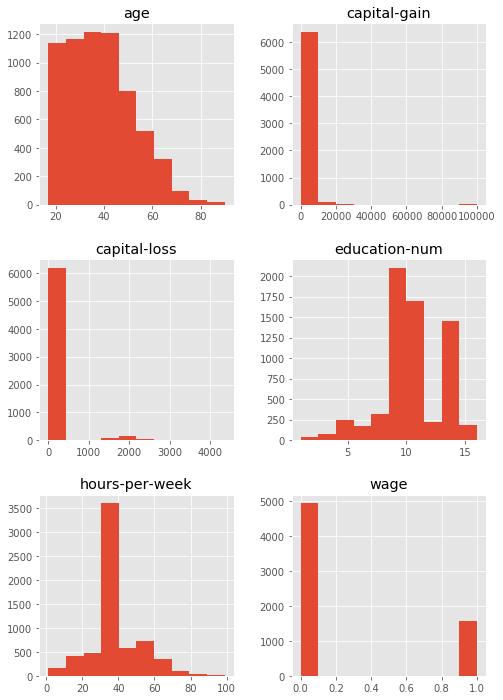

In [14]:
plt.style.use('ggplot')

df2.hist(figsize=(8,12));

In [15]:
df2 = pd.get_dummies(df2, drop_first=True, dummy_na=False, columns=['workclass'])
df2 = pd.get_dummies(df2, drop_first=True, dummy_na=False, columns=['occupation'])
df2 = pd.get_dummies(df2, drop_first=True, dummy_na=False, columns=['sex'])
df2 = pd.get_dummies(df2, drop_first=True, dummy_na=False, columns=['marital-status'])
df2['education-age'] = df2['education-num'] * df2['age']

(35.0, 0.0)

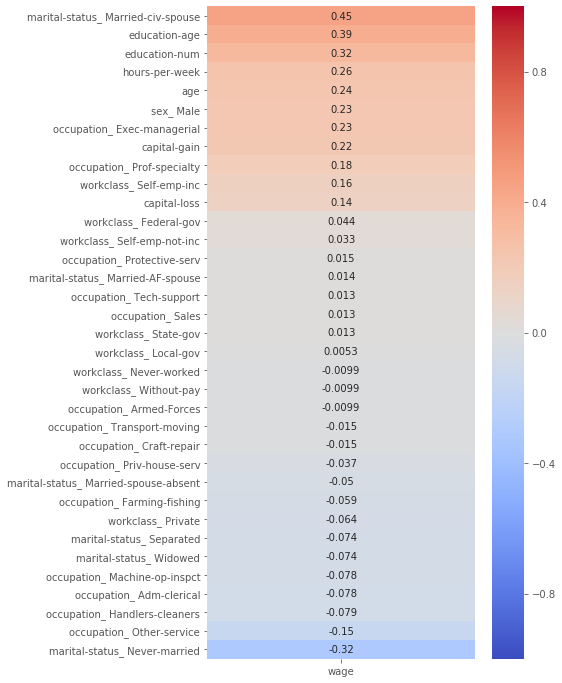

In [16]:
corrs = df2.corr()[['wage']].drop(index='wage').sort_values(by='wage', ascending=False)

plt.figure(figsize=(6,12))
sns.heatmap(corrs, annot=True, vmin=-1, vmax=1, cmap='coolwarm');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

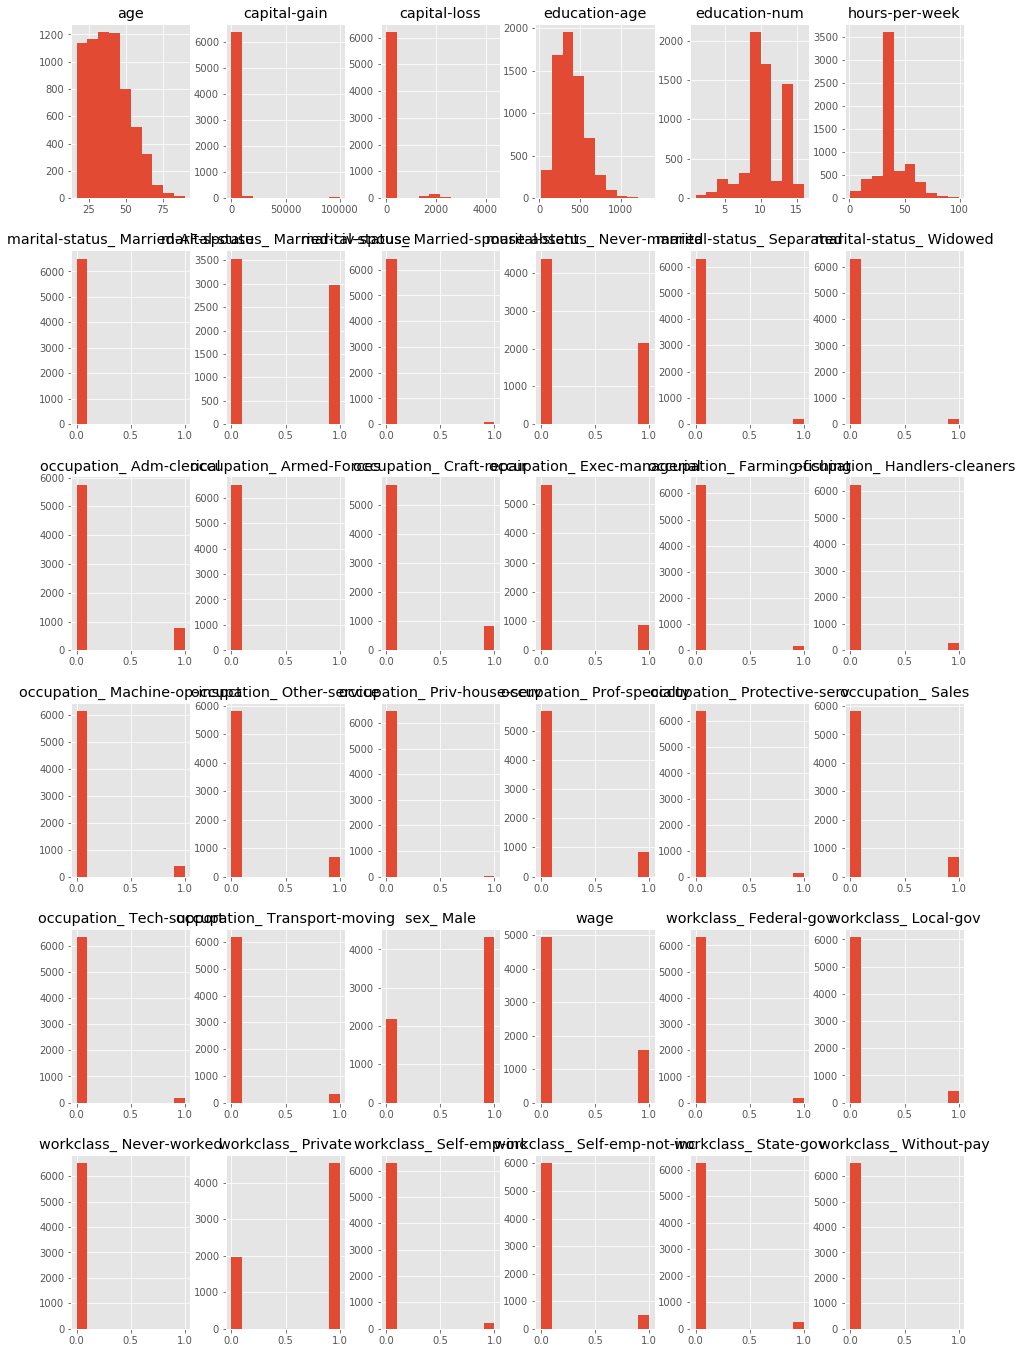

In [17]:
plt.style.use('ggplot')

df2.hist(figsize=(16,24));

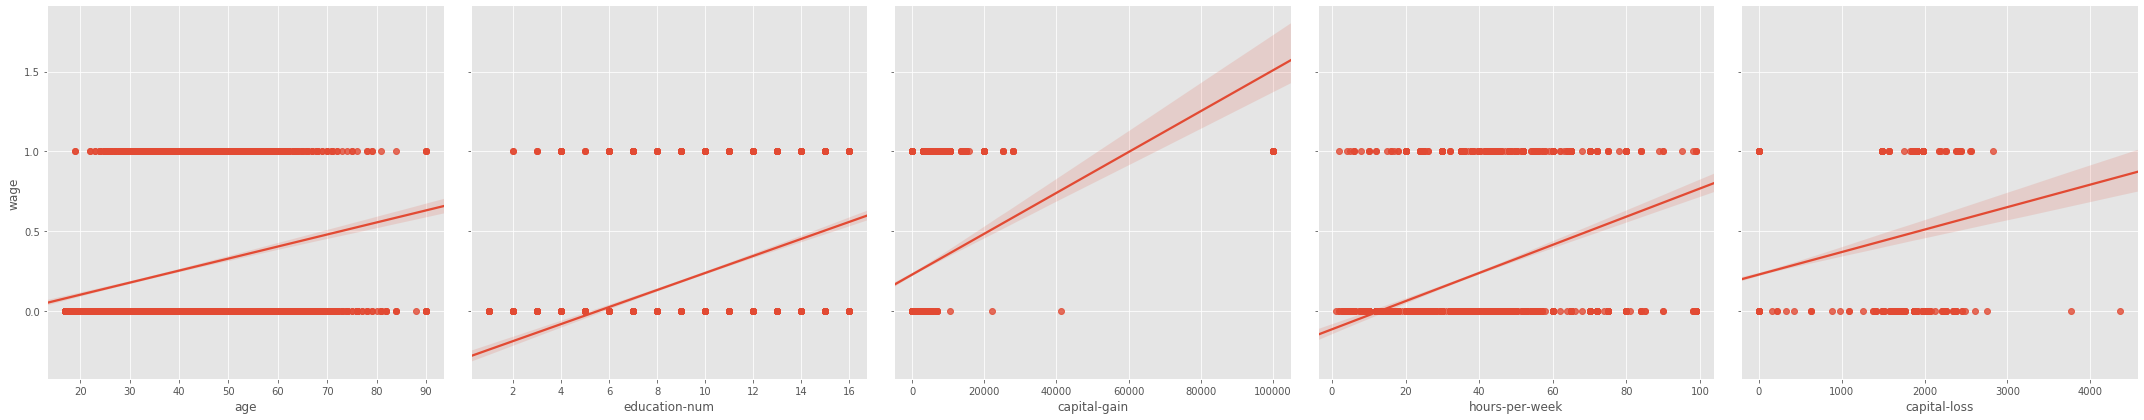

In [18]:
sns.pairplot(df2, x_vars=nd_feat, y_vars=['wage'], height=6, kind='reg');

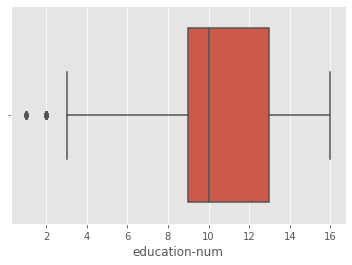

In [19]:
sns.boxplot(df2['education-num']);

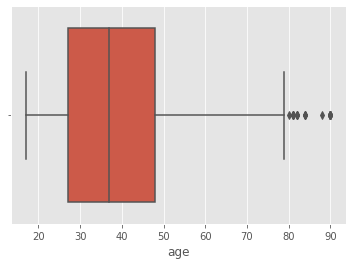

In [20]:
sns.boxplot(df2['age']);

- Creating `X` and `y` variables from what's available with these features
- Note, baseline accuracy is **~75.93%**

In [21]:
df2.shape

(6513, 36)

In [22]:
df2['wage'].value_counts(normalize=True)

0    0.759251
1    0.240749
Name: wage, dtype: float64

In [23]:
X = df2.drop(['wage'], axis = 'columns')
y = df2['wage']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

logreg = LogisticRegression(C=1, solver = 'liblinear')

logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],features):
    coef_dict[feat] = coef

In [26]:
coef_dict

{'age': -0.11107204115187803,
 'workclass': -0.35128099373110366,
 'education-num': 0.00029565532716280035,
 'capital-gain': 0.026525508945581738,
 'hours-per-week': 0.0005244314015191083,
 'capital-loss': 0.3872253720095265,
 'occupation': -0.13573669081291898,
 'wage': -0.004209801041246647,
 'sex': 0.038186857545774056,
 'marital-status': 0.5963954087445258}

In [27]:
print(f'Logistic Regression Train Accuracy Score: \n{logreg.score(X_train, y_train)}')

print(f'Logistic Regression Test Accuracy Score: \n{logreg.score(X_test, y_test)}')

Logistic Regression Train Accuracy Score: 
0.8509418509418509
Logistic Regression Test Accuracy Score: 
0.8391651319828115


In [122]:
pipe3 = Pipeline([
    ('logreg2', LogisticRegression())
])

pipe_params3 = {
    'logreg2__penalty': ['l1', 'l2'],
    'logreg2__C': [1, 10, 100, 1e6, 1e9],
    'logreg2__solver': ['liblinear']
}

In [123]:
grid2 = GridSearchCV(pipe3, pipe_params3, cv=5, verbose=1)

In [124]:
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Rytas\Anaconda3\envs\dsi\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logreg2',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                             

In [119]:
grid2.best_score_

0.8482800982800983

In [120]:
grid2.best_params_

{'logreg2__C': 10, 'logreg2__penalty': 'l1', 'logreg2__solver': 'liblinear'}

In [121]:
grid2.score(X_test, y_test)

0.8471454880294659

In [67]:
predictions = grid2.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, columns=['Predicted <=50K', 'Predicted >50K'], index=['Actual <=50K', 'Actual >50K'])
cm_df

,Predicted <=50K,Predicted >50K
Actual <=50K,1151,86
Actual >50K,163,229


- False Negatives count is very high, currently predicting some people to be a lot poorer than they actually are
- False Positives count is also high

In [47]:
y_test.value_counts()

0    1237
1     392
Name: wage, dtype: int64

In [68]:
[i[1] for i in grid2.predict_proba(X_test.head())]

[0.05616522622883608,
 0.031480275210368606,
 0.020588699470582218,
 0.014990588454651463,
 0.1714347359864558]

In [69]:
pred_proba = [i[1] for i in grid2.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [70]:
pred_df.head()

,true_values,pred_probs
1668,0,0.056165
2031,0,0.031480
5781,0,0.020589
988,0,0.014991
1823,0,0.171435


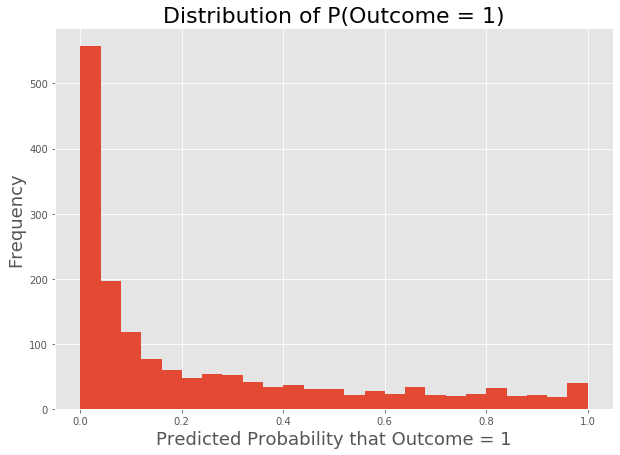

In [71]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations with 25 bins.
plt.hist(pred_df['pred_probs'], bins=25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18);

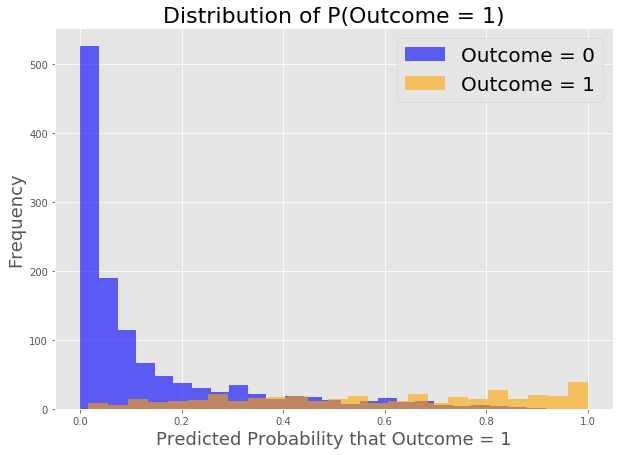

In [72]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

In [73]:
roc_auc_score(pred_df['true_values'],
              pred_df['pred_probs'])

0.9082323511457938

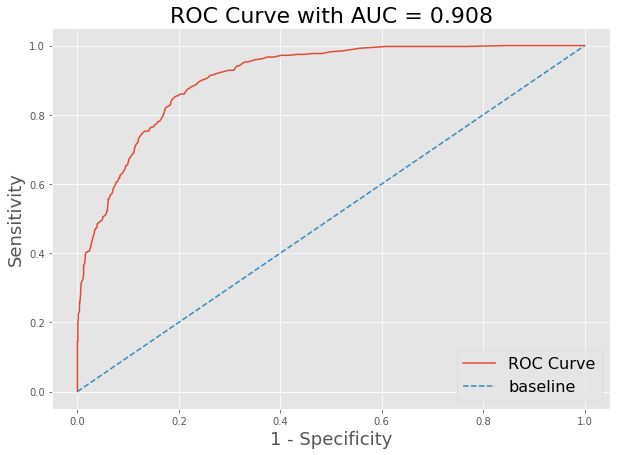

In [77]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

#### Model 2 - $k$-NN Classification

In [131]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(n_jobs=4))
])

pipe_params = {
    'sc__with_mean': [True, False],
    'sc__with_std': [True, False],
    'knn__p': [1, 2, 3],
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': [3, 5, 7, 9, 13, 17]
}

In [132]:
grid1 = GridSearchCV(pipe, pipe_params, cv=5, verbose=1)

In [133]:
grid1.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 17.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=4,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
  

In [134]:
grid1.best_params_

{'knn__n_neighbors': 17,
 'knn__p': 1,
 'knn__weights': 'uniform',
 'sc__with_mean': True,
 'sc__with_std': False}

In [135]:
grid1.best_score_

0.8347665847665847

In [136]:
grid1.score(X_test, y_test)

0.8262737875997545

#### Model 3 - `PolyNomial` Classification

In [35]:
X2 = df2.drop(['wage'], axis = 'columns')
y2 = df2['wage']
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(X)

In [36]:
poly.get_feature_names(X.columns);

In [37]:
X_overfit.shape

(6513, 665)

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_overfit, y, test_size=0.25, random_state=42)

In [39]:
# ss2 = StandardScaler()
# X_train_sc = ss2.fit_transform(X_train2)
# X_test_sc = ss2.transform(X_test2)

In [44]:
logreg2 = LogisticRegression(C=1, solver = 'liblinear')

logreg2.fit(X_train2, y_train2)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print(f'Logistic Regression Train Accuracy Score: \n{logreg2.score(X_train2, y_train)}')

print(f'Logistic Regression Test Accuracy Score: \n{logreg2.score(X_test2, y_test)}')

Logistic Regression Train Accuracy Score: 
0.7088452088452089
Logistic Regression Test Accuracy Score: 
0.7102516881522406


#### Applying to Test data

In [84]:
df_test = pd.read_csv('data/test_data.csv')

In [85]:
df_test.shape

(16281, 13)

In [87]:
df_test.head();

In [88]:
test_features = ['age', 'workclass', 'education-num', 'capital-gain', 'hours-per-week', 'capital-loss', 'occupation', 'sex', 'marital-status']

df_test2 = df_test[test_features]

In [89]:
# Applying my transformation
df_test2 = pd.get_dummies(df_test2, drop_first=True, dummy_na=False, columns=['workclass'])
df_test2 = pd.get_dummies(df_test2, drop_first=True, dummy_na=False, columns=['occupation'])
df_test2 = pd.get_dummies(df_test2, drop_first=True, dummy_na=False, columns=['sex'])
df_test2 = pd.get_dummies(df_test2, drop_first=True, dummy_na=False, columns=['marital-status'])
df_test2['education-age'] = df_test2['education-num'] * df_test2['age']

In [90]:
df_test2.head(3)

,age,education-num,capital-gain,hours-per-week,capital-loss,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,occupation_ Tech-support,occupation_ Transport-moving,sex_ Male,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,education-age
0,25,7,0,40,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,175
1,38,9,0,50,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,342
2,28,12,0,40,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,336


In [92]:
df_test2.isnull().sum().sum()

0

In [93]:
[i[1] for i in grid2.predict_proba(df_test2)]

[0.01013965959313521,
 0.10493096267250136,
 0.39910232686226793,
 0.7844018335335675,
 0.006836795985080172,
 0.004532921932399022,
 0.013397780526175455,
 0.851488852819033,
 0.0098199150906204,
 0.04221721184930615,
 0.7794018883369791,
 0.504545055627445,
 0.016447066032451618,
 0.2131244703990122,
 0.5192760577059555,
 0.8140839752988509,
 0.004282097109738633,
 0.17091156447594147,
 0.007311767713343282,
 0.8025837281655748,
 0.5575524624722541,
 0.011064919980864195,
 0.0033799289008488733,
 0.09620791201441432,
 0.4991484915770189,
 0.8991423821949259,
 0.009727597505373307,
 0.026781166242545756,
 0.2761852033488414,
 0.05699686287944196,
 0.8781796280791485,
 0.00685045059402964,
 0.0419946725648675,
 0.2632861814658655,
 0.0483572635258804,
 0.28239249395390964,
 0.5092957484203973,
 0.006106494570757803,
 0.006573332085183246,
 0.016320816570591895,
 0.8718500580979037,
 0.5678512399657213,
 0.07249698645150679,
 0.06962269078619705,
 0.002913983564920535,
 0.31831292741911

In [110]:
pred_proba2 = [i[1] for i in grid2.predict_proba(df_test2)]

pred_df2 = pd.DataFrame({'wage': pred_proba2})

In [111]:
pred_proba2

[0.01013965959313521,
 0.10493096267250136,
 0.39910232686226793,
 0.7844018335335675,
 0.006836795985080172,
 0.004532921932399022,
 0.013397780526175455,
 0.851488852819033,
 0.0098199150906204,
 0.04221721184930615,
 0.7794018883369791,
 0.504545055627445,
 0.016447066032451618,
 0.2131244703990122,
 0.5192760577059555,
 0.8140839752988509,
 0.004282097109738633,
 0.17091156447594147,
 0.007311767713343282,
 0.8025837281655748,
 0.5575524624722541,
 0.011064919980864195,
 0.0033799289008488733,
 0.09620791201441432,
 0.4991484915770189,
 0.8991423821949259,
 0.009727597505373307,
 0.026781166242545756,
 0.2761852033488414,
 0.05699686287944196,
 0.8781796280791485,
 0.00685045059402964,
 0.0419946725648675,
 0.2632861814658655,
 0.0483572635258804,
 0.28239249395390964,
 0.5092957484203973,
 0.006106494570757803,
 0.006573332085183246,
 0.016320816570591895,
 0.8718500580979037,
 0.5678512399657213,
 0.07249698645150679,
 0.06962269078619705,
 0.002913983564920535,
 0.31831292741911

In [139]:
pred_df2.head()

,wage
0,0.010140
1,0.104931
2,0.399102
3,0.784402
4,0.006837


In [113]:
pred_df2.shape

(16281, 1)

In [141]:
pred_df2.to_csv('data/cheap_sample_rytas.csv', index=False)

#### Comparison Section

In [125]:
print(f'Logistic Regression Train Accuracy Score: \n{logreg.score(X_train, y_train)}')

print(f'Logistic Regression Test Accuracy Score: \n{logreg.score(X_test, y_test)}')

Logistic Regression Train Accuracy Score: 
0.8509418509418509
Logistic Regression Test Accuracy Score: 
0.8391651319828115


In [128]:
print(f'Polynomial Logistic Regression Train Accuracy Score: \n{logreg2.score(X_train2, y_train)}')

print(f'Polynomial Logistic Regression Test Accuracy Score: \n{logreg2.score(X_test2, y_test)}')

Polynomial Logistic Regression Train Accuracy Score: 
0.7088452088452089
Polynomial Logistic Regression Test Accuracy Score: 
0.7102516881522406


In [130]:
print(f'GridSearchCV (LogReg) Train Accuracy Score: \n{grid2.score(X_train, y_train)}')

print(f'GridSearchCV (LogReg) Test Accuracy Score: \n{grid2.score(X_test, y_test)}')

GridSearchCV (LogReg) Train Accuracy Score: 
0.8507371007371007
GridSearchCV (LogReg) Test Accuracy Score: 
0.8471454880294659


In [138]:
print(f'k-NN Train Accuracy Score: \n{grid1.score(X_train, y_train)}')

print(f'k-NN Test Accuracy Score: \n{grid1.score(X_test, y_test)}')

k-NN Train Accuracy Score: 
0.8507371007371007
k-NN Test Accuracy Score: 
0.8262737875997545
